In [18]:
import pandas as pd
import xarray as xr
import metpy
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import warnings
import urllib.request
url = "https://raw.githubusercontent.com/syedhamidali/test_scripts/master/map_features.py"
urllib.request.urlretrieve(url, "map_features.py")
import map_features as mf
warnings.filterwarnings("ignore")

In [43]:
data = "https://raw.githubusercontent.com/wblumberg/SHARPpy/065d33ef4bde996e6b06e8b486f70a27684d6ddd/datasources/um-prof.csv"
df = pd.read_csv(data)

In [44]:
df['synop'] = df['synop'].astype('Int64')

In [45]:
filtered_df = df[(df['lat'] >= 30) & (df['lat'] <= 35) & (df['lon'] >= -95) & (df['lon'] <= -85)]

In [46]:
filtered_df.reset_index(drop=True, inplace=True)

In [47]:
# filtered_df.replace(0, -9999)

In [48]:
filtered_df

,icao,iata,synop,name,state,country,lat,lon,elev,priority,srcid
0,KGWX,GWX,<NA>,Columbus AFB,MS,US,33.90,-88.33,108,8,CBN
1,KPNS,PNS,72222,Pensacola,FL,US,30.47,-87.18,38,6,KPNS
2,KMOB,MOB,72223,Mobile/Bates Field,AL,US,30.68,-88.25,63,3,KMOB
3,KPFN,PFN,<NA>,Panama City,FL,US,30.22,-85.68,12,8,KPFN
4,KMGM,MGM,72226,Montgomery,AL,US,32.30,-86.40,63,4,KMGM
5,KDHN,DHN,<NA>,Dothan,AL,US,31.32,-85.45,113,6,KDHN
6,KBHM,BHM,72228,Birmingham Intl,AL,US,33.57,-86.75,197,4,KBHM
7,KTCL,TCL,<NA>,Tuscaloosa,AL,US,33.22,-87.62,49,6,KTCL
8,KANB,ANB,<NA>,Anniston Metro,AL,US,33.58,-85.85,183,6,KANB
9,KCKL,CKL,<NA>,Centreville,AL,US,32.90,-87.25,140,8,KCKL


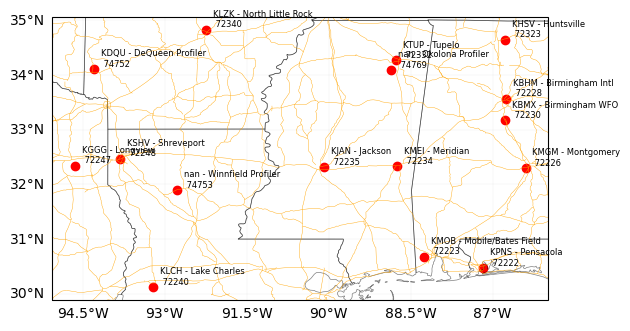

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Exclude rows with NaN values in the 'synop' column
filtered_df = filtered_df.dropna(subset=['synop'])

# Create the map figure and axes
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

# Scatter plot the points
sc = ax.scatter(filtered_df['lon'], filtered_df['lat'], marker='o', color='red', transform=ccrs.PlateCarree())

# Annotate each point with the synop, icao, and name values
for i, row in filtered_df.iterrows():
    annotation = f"{row['icao']} - {row['name']}\n {row['synop']}"
    ax.annotate(annotation, xy=(row['lon'], row['lat']), xytext=(5, 2),
                textcoords='offset points', color='black', size=6)

# Set the map features
mf.map_features(ax=ax, b=True, l=True, roads=True)
# Show the plot
plt.show()


In [50]:
import requests
from bs4 import BeautifulSoup

In [51]:
url = "https://www.sparc-climate.org/data-centre/data-access/us-radiosonde/us-upper-air-station-details/"

response = requests.get(url, verify=False)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table element with class 'rtetable'
table = soup.find('table', class_='rtetable')

# Extract the table data into a list of lists
data = []
for row in table.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all('td')]
    data.append(row_data)

# Convert the list of lists into a DataFrame
tb = pd.DataFrame(data[1:], columns=data[0])

In [59]:
tb['Lat'] = tb['Lat'].astype(float)
tb['Lon'] = tb['Lon'].astype(float)

In [61]:
tb_filtered = tb[(tb['Lat'] >= 30) & (tb['Lat'] <= 35) & (tb['Lon'] >= -95) & (tb['Lon'] <= -85)]
tb_filtered.reset_index(drop=True, inplace=True)

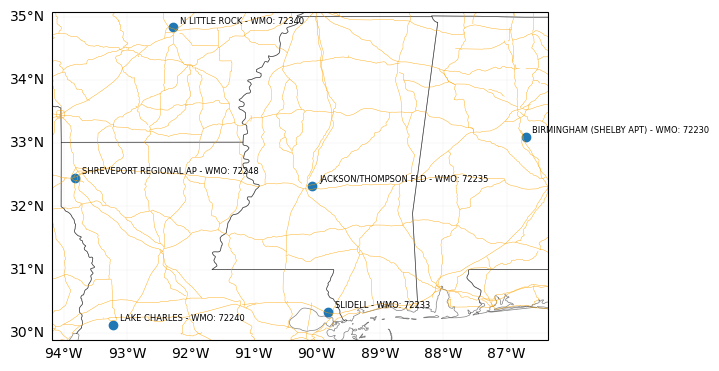

In [69]:
import matplotlib.pyplot as plt

# Create the map figure and axes
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
# Create a scatter plot of the latitude and longitude
ax.scatter(tb_filtered['Lon'], tb_filtered['Lat'])

# Annotate each point with the 'Station Name' and 'WMO' values
for i, row in tb_filtered.iterrows():
    annotation = f"{row['Station Name']} - WMO: {row['WMO']}"
    plt.annotate(annotation, xy=(row['Lon'], row['Lat']), xytext=(5, 3),
                 size=6, textcoords='offset points')

# Set the plot title
# plt.title('US Upper Air Stations')
# Set the map features
mf.map_features(ax=ax, b=True, l=True, roads=True)
# Show the plot
# Show the plot
plt.show()
